In [1]:
from slam.basis import MixedOrderBasisCircuitTemplate
import numpy as np
from slam.utils.gates.duraton_scaling import atomic_cost_scaling
from slam.utils.gates.family_extend import recursive_sibling_check
from slam.utils.polytopes.polytope_wrap import monodromy_range_from_target

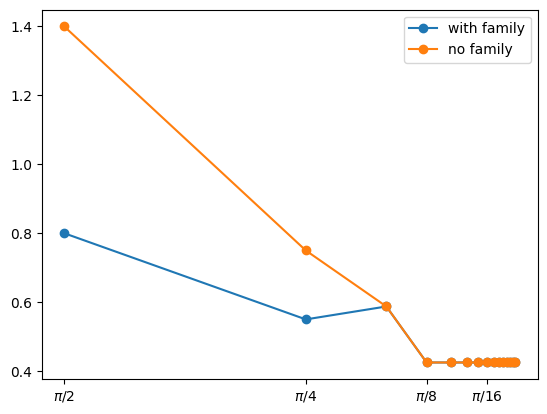

In [2]:
from slam.utils.gates.custom_gates import ConversionGainGate
params = [0,0, 0, np.pi/32, 1]
basis = ConversionGainGate(*params)
template = MixedOrderBasisCircuitTemplate(base_gates=[basis], chatty_build=False, use_smush_polytope=0)
from qiskit.circuit.library import CPhaseGate

target_list = []
fam_list = []
no_fam_list = []
# iterate over CPHASe targets
for t_phase in range(1,16):
    t_phase = np.pi/2 * (1/t_phase)
    target_list.append(t_phase)
    target = CPhaseGate(theta=t_phase).to_matrix()
    duration = atomic_cost_scaling(params, 1, speed_method='linear', duration_1q=0)
    ret = recursive_sibling_check(template, target, cost_1q=0.1, basis_factor=duration[1])
    decomp_cost = ret[1]
    # print(f"Relative cost {ret[1]}")
    # ret[0].circuit.draw()
    fam_list.append(decomp_cost)


    #compare to no family
    template = MixedOrderBasisCircuitTemplate(base_gates=[basis], chatty_build=False, use_smush_polytope=0)
    ki = monodromy_range_from_target(template, target)[0]
    decomp_cost = ki * duration[1] + (ki+1) * 0.1
    no_fam_list.append(decomp_cost)

# plot results
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(target_list, fam_list, label='with family', marker='o')
ax.plot(target_list, no_fam_list, label='no family', marker='o')
# reverse axis
ax.invert_xaxis()
# unit axis in pi
ax.set_xticks([np.pi/2, np.pi/4, np.pi/8, np.pi/16])
ax.set_xticklabels(['$\pi/2$', '$\pi/4$', '$\pi/8$', '$\pi/16$'])

#legend
ax.legend()

In [ ]:
from slam.utils.gates.custom_gates import ConversionGainGate
params = [0,0, 0, np.pi/32, 1]
basis = ConversionGainGate(*params)
template = MixedOrderBasisCircuitTemplate(base_gates=[basis], chatty_build=False, use_smush_polytope=0)
from qiskit.circuit.library import CPhaseGate

target_list = []
fam_list = []
no_fam_list = []
# iterate over CPHASe targets
for t_phase in range(1,16):
    t_phase = np.pi/2 * (1/t_phase)
    target_list.append(t_phase)
    target = CPhaseGate(theta=t_phase).to_matrix()
    duration = atomic_cost_scaling(params, 1, speed_method='linear', duration_1q=0)
    ret = recursive_sibling_check(template, target, cost_1q=0.1, basis_factor=duration[1])
    decomp_cost = ret[1]
    # print(f"Relative cost {ret[1]}")
    # ret[0].circuit.draw()
    fam_list.append(decomp_cost)


    #compare to no family
    template = MixedOrderBasisCircuitTemplate(base_gates=[basis], chatty_build=False, use_smush_polytope=0)
    ki = monodromy_range_from_target(template, target)[0]
    decomp_cost = ki * duration[1] + (ki+1) * 0.1
    no_fam_list.append(decomp_cost)

# plot results
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(target_list, fam_list, label='with family', marker='o')
ax.plot(target_list, no_fam_list, label='no family', marker='o')
# reverse axis
ax.invert_xaxis()
# unit axis in pi
ax.set_xticks([np.pi/2, np.pi/4, np.pi/8, np.pi/16])
ax.set_xticklabels(['$\pi/2$', '$\pi/4$', '$\pi/8$', '$\pi/16$'])

#legend
ax.legend()

In [ ]:
#make a plot that shows E[haar] as a function of nth root of iswap for varying 1Q durations
from slam.scripts.gate_exploration.bgatev2script import build_gates
from slam.scripts.gate_exploration.bgatev2script import cost_scaling
unitary_list, coordinate_list = build_gates()
gates = unitary_list
import matplotlib.pyplot as plt
#use matplotlib scientific style
with plt.style.context(['science','ieee']):
    plt.rcParams.update({'text.latex.preamble': r'\usepackage{amsfonts}'})
    #create plot
    h2_list = []
    fig, ax = plt.subplots()
    for duration_1q in [0, .1, .25]:
        h_list = []
        x_list = []
        for gate in gates[1:]:
            if gate.params[2] != 0: #only want to keep iswap gates
                continue
            h = cost_scaling(speed_method='linear', duration_1q=duration_1q, query_params=gate.params)[1][0]
            x_list.append(gate.params[3]/(np.pi/2))
            h_list.append(h)

            #tracking bare costs, but only need to do over a single 1Q duration
            if duration_1q == 0:
                h2 = cost_scaling(speed_method='bare', duration_1q=0, query_params=gate.params)[1][0]
                h2_list.append(h2)

        ax.plot(x_list, h_list, label=f"D[1Q]={duration_1q}", marker='o', markersize=3)

    # plot h2 on a second y-axis
    ax2 = ax.twinx()
    ax2.plot(x_list, h2_list, label=r"Gate count ($k$)", marker = 's', markersize=3, color='green')

    #reverse x axis
    ax.set_xlim(ax.get_xlim()[::-1])
    # xaxis
    ax.set_xlabel(r"\sqrt[1/x{\texttt{iSWAP}} Basis")
    # yaxis
    ax.set_ylabel("Expected Duration of Haar Gate")
    # title
    # ax.set_title(r"$\mathbb{E}$[D[Haar]]" + " vs. " + r"D[$\sqrt[1/x]{\texttt{iSwap}}]$")
    # legend off plot to the right
    ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.63))
    ax2.legend(loc='center left', bbox_to_anchor=(1.05, 0.8))

    # figure size for column width of IEEE
    fig.set_size_inches(3.5, 2.5)
    # shrink plot to fit legend
    plt.tight_layout()
    plt.show()

from slam.utils.visualize import fpath_images
# save as png
fig.savefig(f'{fpath_images}/haar_vs_iswap.png', format='png')
#save matplotlib fig as pdf
fig.savefig(f'{fpath_images}/haar_vs_iswap.pdf', format='pdf')

In [ ]:
#make a plot that shows E[haar] as a function of nth root of iswap for varying 1Q durations'

# Similar as above but we want to use family extended haar scores
from slam.utils.gates.custom_gates import ConversionGainGate
from slam.scripts.gate_exploration.bgatev2script import build_gates
from slam.scripts.gate_exploration.bgatev2script import cost_scaling
from qiskit.circuit.library import CXGate, SwapGate
from tqdm import tqdm
from qiskit.quantum_info.random import random_unitary
unitary_list, coordinate_list = build_gates()
gates = unitary_list
import matplotlib.pyplot as plt
#use matplotlib scientific style

x_list = []
fam_haar = []
no_fam_haar = []
fam_swap = []
no_fam_swap = []
fam_cx = []
no_fam_cx = []

params = [0,0, 0, np.pi/2]

for di, duration_1q in enumerate([.25]):
    fam_haar_inner = []
    no_fam_haar_inner = []
    swap_inner = []
    swap_no_fam_inner = []
    cnot_inner = [] 
    cnot_no_fam_inner = []

    for frac_gate in range(1,16):

        if di == 0:
            x_list.append(1/frac_gate)
        basis = ConversionGainGate(*params, t_el=(1/frac_gate))
        template = MixedOrderBasisCircuitTemplate(base_gates=[basis], chatty_build=False, use_smush_polytope=0)
                    
        # compute the new haar score
        haar_score = 0
        no_fam_score = 0
        duration = atomic_cost_scaling(params+[1/frac_gate], 1, speed_method='linear', duration_1q=0)


     
        target = CXGate().to_matrix()
        ret = recursive_sibling_check(template, target, cost_1q=0.1, basis_factor=duration[1])
        cnot_inner.append(ret[1])
        template = MixedOrderBasisCircuitTemplate(base_gates=[basis], chatty_build=False, use_smush_polytope=0)
        ki = monodromy_range_from_target(template, target)[0]
        decomp_cost = ki * duration[1] + (ki+1) * 0.1
        cnot_no_fam_inner.append(decomp_cost)

        target = SwapGate().to_matrix()
        ret = recursive_sibling_check(template, target, cost_1q=0.1, basis_factor=duration[1])
        swap_inner.append(ret[1])
        template = MixedOrderBasisCircuitTemplate(base_gates=[basis], chatty_build=False, use_smush_polytope=0)
        ki = monodromy_range_from_target(template, target)[0]
        decomp_cost = ki * duration[1] + (ki+1) * 0.1
        swap_no_fam_inner.append(decomp_cost)

        N = 2000
        for target in tqdm(range(N)):
            #score with family
            target = random_unitary(dims=4, seed=42).data
            #
            ret = recursive_sibling_check(template, target, cost_1q=0.1, basis_factor=duration[1])
            haar_score += ret[1]

            #compare to no family 
            template = MixedOrderBasisCircuitTemplate(base_gates=[basis], chatty_build=False, use_smush_polytope=0)
            ki = monodromy_range_from_target(template, target)[0]
            decomp_cost = ki * duration[1] + (ki+1) * 0.1
            no_fam_score += decomp_cost
            
        fam_haar_inner.append(haar_score/N)
        no_fam_haar_inner.append(no_fam_score / N)
    
    fam_swap.append(swap_inner)
    no_fam_swap.append(swap_no_fam_inner)
    fam_cx.append(cnot_inner)
    no_fam_cx.append(cnot_no_fam_inner)
    fam_haar.append(fam_haar_inner)
    no_fam_haar.append(no_fam_haar_inner)
    
        # #tracking bare costs, but only need to do over a single 1Q duration
        # if duration_1q == 0:
        #     h2 = cost_scaling(speed_method='bare', duration_1q=0, query_params=gate.params)[1][0]
        #     h2_list.append(h2)

In [ ]:
# use ieee science style
with plt.style.context(['ieee', 'science']):
    # plot the results
    # make figure size smaller for column width
    fig, ax = plt.subplots(figsize=(3.5, 2.5))
    for di, duration_1q in enumerate([.25]):
        
        ax.plot(x_list[1:], no_fam_haar[di][1:], label=f'E[Haar]', marker='o', markersize=1, color='k', linestyle='--')
        ax.plot(x_list[1:], no_fam_swap[di][1:], label=f'D[Swap]', marker='o', markersize=1, color='b', linestyle='--')
        ax.plot(x_list[1:], no_fam_cx[di][1:], label=f'D[CX]', marker='o', markersize=1, color='r', linestyle='--')

        ax.plot(x_list[1:], fam_haar[di][1:], label=f'E[Haar], Family-Extend', marker='o', markersize=1, color='k', linestyle='-')
        ax.plot(x_list[1:], fam_swap[di][1:], label=f'D[Swap], Family-Extend', marker='o', markersize=1, color='b', linestyle='-')
        ax.plot(x_list[1:], fam_cx[di][1:], label=f'D[CX], Family-Extend',    marker='o', markersize=1, color='r', linestyle='-')

    #legend on bottom
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), ncol=2, frameon=False)
    # make legend text smaller
    # reverse x axis
    plt.xlim(plt.xlim()[::-1])
    # set x axis label
    ax.set_xlabel(r'$\sqrt[1/x]{iSwap}$ Fractional Basis')
    # set y axis label
    ax.set_ylabel('Duration Cost')
plt.show();